**Lab assignment 1**

Notebook introducing the search algorithms applied on the n-puzzle.

It is used to familiarize oneself with the use of the file search.py, the execution of search strategies, and the visualization of solutions.

In [1]:
# pip install matplotlib tabulate numpy 

In [2]:
import search
from search import *

**Methods to simplify the execution of the available algorithms**

In [3]:
# Auxiliary methods to execute the algorithms

def run_algorithm(algorithm_name, initial_state, end_state, size, depth=50, heuristic_func=None):
    """
    Runs the algorithm indicated by the name and returns its results.
    Returns:
        dict: Dictionary with the results of the algorithm, or None if an error occurs
    """
    solution_data = None

    if algorithm_name == 'BFS':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, lambda s, es: 0, size)
        print("BFS executed")

    elif algorithm_name == 'DFS (Graph Search)':
        solution_data = graphSearch(initial_state, end_state, lambda x: -1, lambda s, es: 0, size, maximum_depth=depth)
        print("DFS (Graph Search) executed")

    elif algorithm_name == 'DFS-B':
        results_dict, _ = DFS_B(initial_state, end_state, size=size, maximum_depth=depth)
        solution_data = results_dict
        print("DFS-B executed")

    elif algorithm_name == 'Voraz (Manhattan)':  # Greedy (Manhattan)
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 0, manhattan_h_search, size)
        print("Voraz (Manhattan) executed")

    elif algorithm_name == 'ID':
        solution_data = ID_B(initial_state, end_state, size=size)
        print("ID executed")

    elif algorithm_name == 'A* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, manhattan_h_search, size)
        print("A* (Manhattan) executed")

    elif algorithm_name == 'A (MD + LC)':
        md_lc_h_search = lambda s, es_local=end_state: get_md_plus_linear_conflict(s, es_local)
        solution_data = graphSearch(initial_state,end_state,  lambda x: 1, md_lc_h_search, size)
        print("A (Manhattan + Linear_conflict) executed")

    elif algorithm_name == 'IDA* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = IDA_B(initial_state, end_state, size, manhattan_h_search)
        print("IDA* (Manhattan) executed")

    else:
        print(f"Algorithm {algorithm_name} not found!")
        return None

    if solution_data:
        if not solution_data['path'] or len(solution_data['path']) == 0:
            print(f"No solution found for {algorithm_name}")
        return {algorithm_name: solution_data}
    else:
        print(f"No solution data returned for {algorithm_name}")
        return {algorithm_name: {}}  # Return empty dict for the algorithm



def run_all_algorithms(initial_state, end_state, size, depth = 50):
    """
    Runs all the defined algorithms and returns their results.
    Returns:
        dict: Dictionary with the results of all of the algorithms executed
    """
    algorithms = [
        'BFS',
        'DFS-B',
        'Voraz (Manhattan)',  # Greedy (Manhattan)
        'ID',
        'A* (Manhattan)',
        'A (MD + LC)',
        'IDA* (Manhattan)',
    ]

    results = {}
    seen_algos = set()  
    for algo in algorithms:
        if algo not in seen_algos:  
            seen_algos.add(algo)
            algo_result = run_algorithm(algo, initial_state, end_state, size, depth)
            if algo_result and algo in algo_result:
                results[algo] = algo_result[algo]
    
    return results


**Example with size 3**

The initial and goal states are defined, all available algorithms are executed, and the results are displayed

BFS executed
DFS-B executed
Voraz (Manhattan) executed
ID executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
IDA* (Manhattan) executed
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |    Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+=============+===================+==================+====================+
| BFS               |     22 |      22 | 0.594737    |            233687 |            86871 |             110729 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| DFS-B             |     38 |      40 | 2.40286     |           2028383 |          1301341 |                 41 |
+-------------------+--------+---------+-------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |     22 |      2

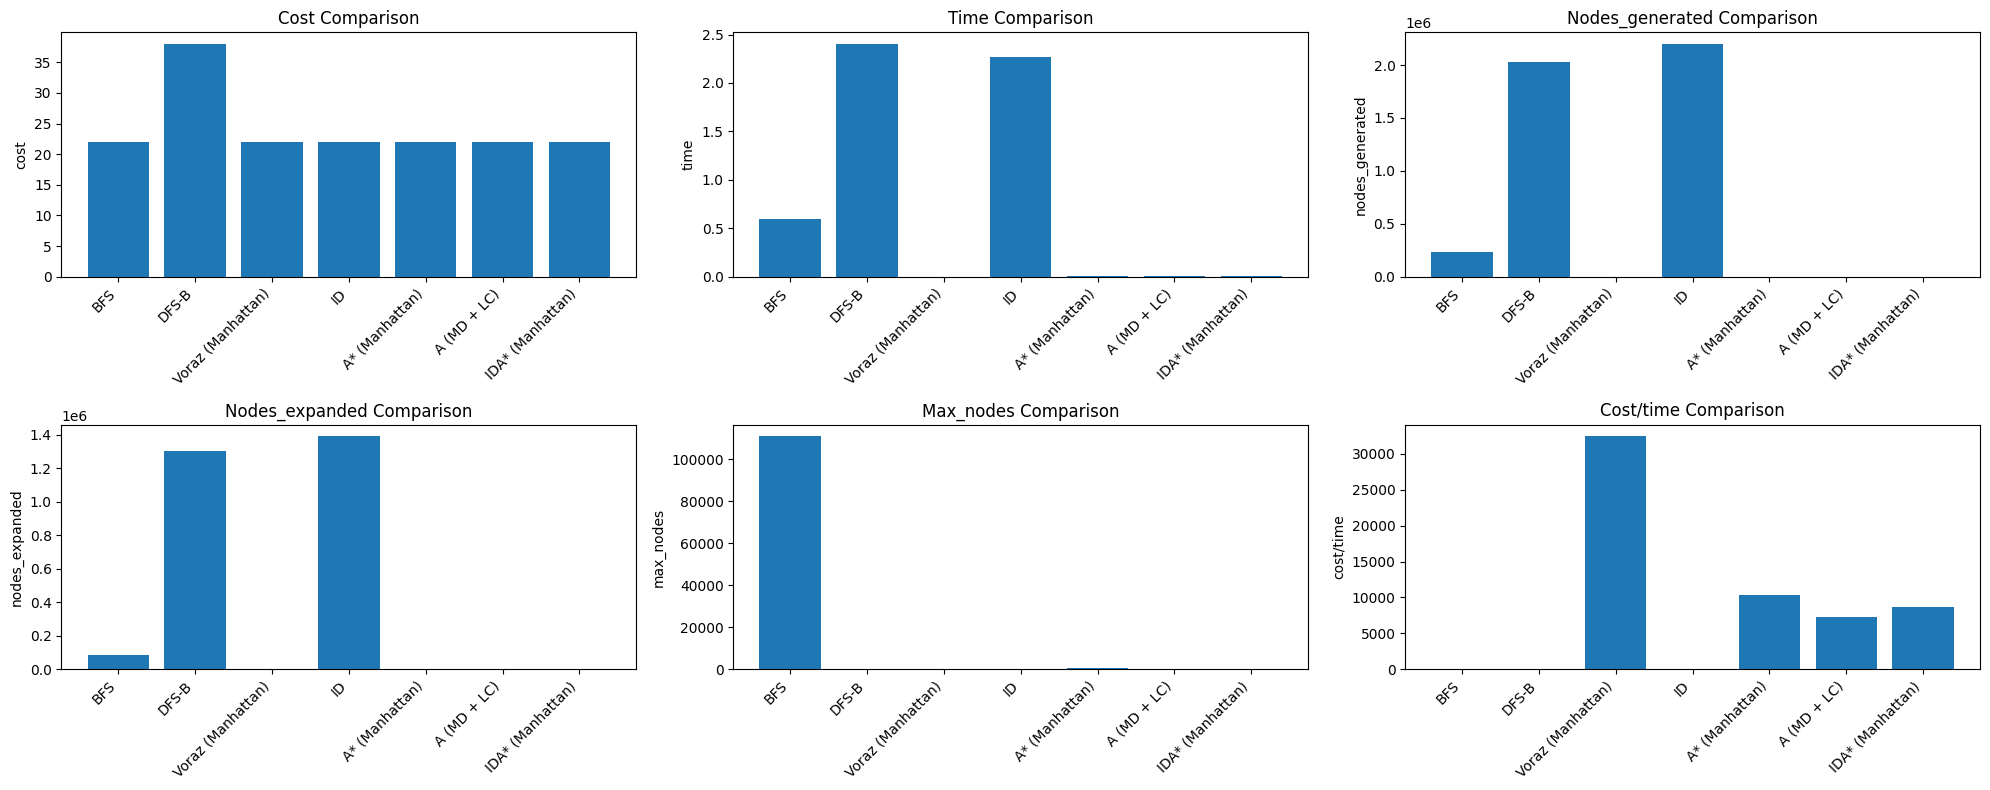

In [4]:
# Size 3

size = 3  # Example for a 3x3 puzzle

initial_state_matrix = [
    [7, 8, 1],
    [4, 0, 6],
    [2, 3, 5]
]

end_state_matrix = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run all of the algorithms and show the results as a table
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function that runs all the algorithms
    results = run_all_algorithms(initial_state, end_state, size, 40)
    show_results(results)
    plot_algorithm_comparison(results)
else:
    print("The puzzle is not solvable.")




**Example: Displaying a solution**

We display the solution obtained for the case of A* Manhattan

In [5]:
# Displaying the solution for one of the executed algorithms 
show_path_for_algorithm(results, 'A* (Manhattan)', size)

Path for A* (Manhattan) (Length: 22 steps):
Level 0

 7  8  1
 4     6
 2  3  5

--------------------
(Move tile: 4)

Level 1

 7  8  1
    4  6
 2  3  5

--------------------
(Move tile: 7)

Level 2

    8  1
 7  4  6
 2  3  5

--------------------
(Move tile: 8)

Level 3

 8     1
 7  4  6
 2  3  5

--------------------
(Move tile: 1)

Level 4

 8  1   
 7  4  6
 2  3  5

--------------------
(Move tile: 6)

Level 5

 8  1  6
 7  4   
 2  3  5

--------------------
(Move tile: 4)

Level 6

 8  1  6
 7     4
 2  3  5

--------------------
(Move tile: 3)

Level 7

 8  1  6
 7  3  4
 2     5

--------------------
(Move tile: 2)

Level 8

 8  1  6
 7  3  4
    2  5

--------------------
(Move tile: 7)

Level 9

 8  1  6
    3  4
 7  2  5

--------------------
(Move tile: 8)

Level 10

    1  6
 8  3  4
 7  2  5

--------------------
(Move tile: 1)

Level 11

 1     6
 8  3  4
 7  2  5

--------------------
(Move tile: 3)

Level 12

 1  3  6
 8     4
 7  2  5

--------------------
(Move t

**Example with size 4**

In [6]:
 # Size 4

size = 4

initial_state_matrix = [
    [13, 2, 10, 3],
    [1, 12, 8, 4],
    [5, 0, 9, 6],
    [15, 14, 11, 7]
]

end_state_matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run two specific algorithms
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A (MD + LC)', initial_state, end_state, size)
    results.update(algo_result)
    
    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)  # Greedy (Manhattan)
    results.update(algo_result)
        
    show_results(results)
else:
    print("The puzzle is not solvable.")


A (Manhattan + Linear_conflict) executed
Voraz (Manhattan) executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A (MD + LC)       |     41 |      41 |  0.806556  |             48468 |            16293 |              30776 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    111 |     111 |  0.0398991 |              4983 |             1594 |               3277 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+




**Example with size 5**

In [7]:
# Size 5

size = 5
initial_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [0, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 24, 23, 11]
]

end_state_matrix = [
  [1, 2, 3, 4, 5],
  [6, 7, 8, 9, 10],
  [11, 12, 13, 14, 15],
  [16, 17, 18, 19, 20],
  [21, 22, 23, 24, 0]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run two specific algorithms
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function to run the algorithms
    algo_result = run_algorithm('A (MD + LC)', initial_state, end_state, size)
    results.update(algo_result)
    
    algo_result = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)  # Greedy (Manhattan)
    results.update(algo_result)
        
    show_results(results)

else:
    print("The puzzle is not solvable.")



A (Manhattan + Linear_conflict) executed
Voraz (Manhattan) executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| A (MD + LC)       |     30 |      30 |  3.18663   |            100170 |            30641 |              66951 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Voraz (Manhattan) |    138 |     138 |  0.0684483 |              5718 |             1688 |               3985 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+




**Test with size n, auto-generating the initial state and the goal state**

Here we consider how to generalize to n the size of the puzzle

Initial state:

    4  8
 7  5  6
 2  3  1

End state:

 1  2  3
 4  5  6
 7  8   

Voraz (Manhattan) executed
A* (Manhattan) executed
A (Manhattan + Linear_conflict) executed
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm         |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+===================+========+=========+============+===================+==================+====================+
| Voraz (Manhattan) |     48 |      48 | 0.00140238 |               276 |              104 |                169 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| A* (Manhattan)    |     26 |      26 | 0.0154653  |              3123 |             1177 |               1860 |
+-------------------+--------+---------+------------+-------------------+------------------+--------------------+
| A (MD + LC)       |     

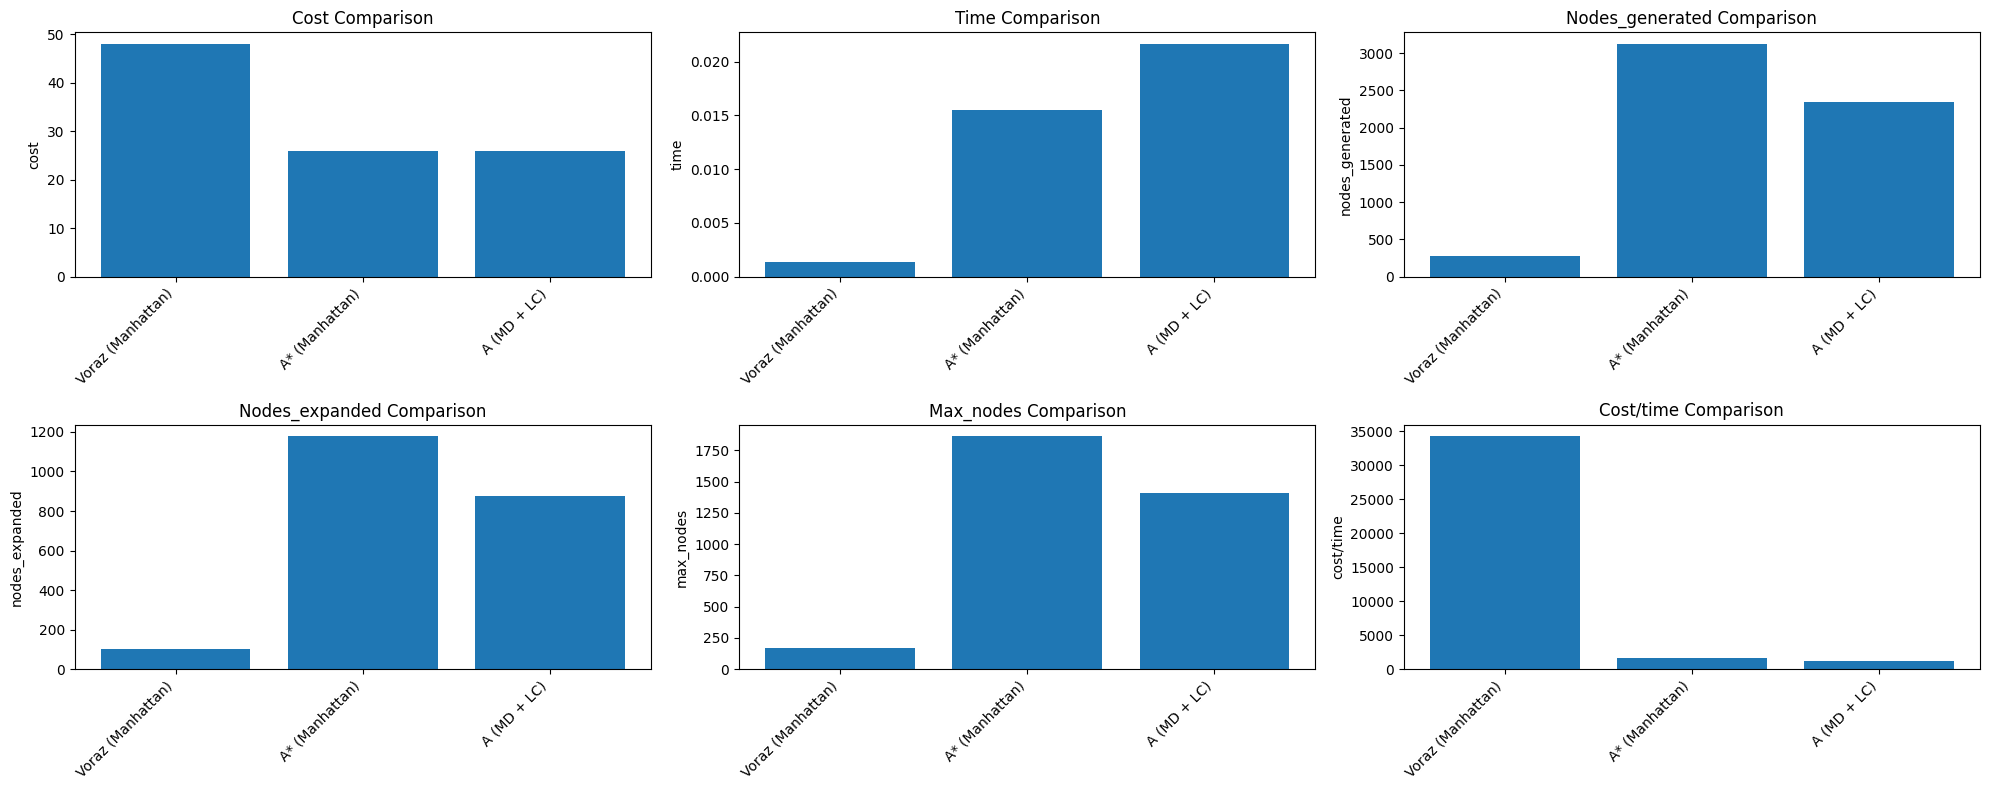

In [8]:
# Test with size n, auto-generating the initial state and the goal state 
size = 3
end_state = generate_ordered_state(size)
#end_state = generate_spiral_state(size)
initial_state = generate_random_state(size, end_state)


print("Initial state:\n")
visualize_state(initial_state)

print("\nEnd state:\n")
visualize_state(end_state)
print()

# Running some specific algorithms
results = {}

alg_results = run_algorithm('Voraz (Manhattan)', initial_state, end_state, size)  # Greedy (Manhattan)
results.update(alg_results)
alg_results = run_algorithm('A* (Manhattan)', initial_state, end_state, size)
results.update(alg_results)
alg_results = run_algorithm('A (MD + LC)', initial_state, end_state, size)
results.update(alg_results)

show_results(results)
plot_algorithm_comparison(results)

#show_path_for_algorithm(results, 'A (MD + LC)', size)